LE409 - Estatística e Probabilidade para Engenharia

Prof. Leonardo Tomazeli Duarte - FCA/UNICAMP

Atividade 11 - Projeto Computacional (12/12/2021)

- Augusto Chebel Machado - RA: 231762

- Lucas Tramonte - RA: 182697

Enunciado:

Deseja realizar um estudo para investigar o efeito de um novo processo no tempo médio (em minutos) da fila do setor de manutenção
de uma certa indústria. Nesta atividade, o objetivo é verificar se, de fato, o novo processo pode diminuir o tempo médio da fila
observado com a política atual do setor.

Para tanto, foram levantados dois conjuntos de dados. O primeiro deles (grupo de controle)
corresponde a amostras dos tempos gastos na fila considerando um longo histórico obtido com a política atual. Um segundo grupo
(grupo de tratamento) corresponde a amostras dos tempos gastos na fila após a aplicação do novo processo.


In [ ]:
# Importando as bibliotecas que serão utilizadas:
import numpy as np
from scipy.stats import norm
from scipy.stats import t as t_student
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

Dois últimos dígitos do menor RA da dupla (182697 < 231762): 97

Portanto, o conjunto de dados considerado foi:

- M_controle_97: Conjunto de dados que representam os tempos de espera dos equipamentos na fila considerando a
política atual da indústria (grupo de controle);

- M_tratamento_97: Conjunto de dados que representam os tempos de espera dos equipamentos na fila considerando
o novo processo (grupo de tratamento).


In [ ]:
# Leitura de dados do Excel
# IMPORTANTE: É necessário que os arquivos .xlsx estejam no diretório do Google Colab!
# Quando fecha-se o programa, os arquivos não ficam salvos!

df_controle = pd.read_excel('M_controle_97.xlsx', index_col=0)
df_tratamento = pd.read_excel('M_tratamento_97.xlsx', index_col=0)

# Convertendo dados lidos para array do NumPy
data_c = df_controle.to_numpy()
data_t = df_tratamento.to_numpy()

# Verificando se a importação ocorreu corretamente:
print('data_controle:')
print(f'Tamanho: {data_c.size}')
print(data_c)

print('\ndata_tratamento:')
print(f'Tamanho: {data_t.size}')
print(data_t[0:3])                # apenas para efeito visuais
print('   ...')                   # se fizer print(data_t) imprime-se todas as 500 linhas
print(data_t[497:500])

data_controle:
Tamanho: 24800
[[ 752.01791838]
 [ 971.50484213]
 [ 732.99849632]
 ...
 [1171.100619  ]
 [ 842.93410071]
 [ 845.16136474]]

data_tratamento:
Tamanho: 500
[[912.52148123]
 [738.03314547]
 [616.86399392]]
   ...
[[423.02435694]
 [718.442854  ]
 [651.80498197]]


(a) Realizar uma análise descritiva (média, mediana, quartis, desvio etc.)
dos dois conjuntos de dados fornecidos.

In [ ]:
# Análise Descritiva:

# Dados_controle:
amostras_c = data_c.size                          # número de dados
media_c  = data_c.mean()                          # média
mediana_c = np.percentile(data_c, 50)             # mediana
prim_quartil_c = np.quantile(data_c, 0.25)        # primeiro quartil
seg_quartil_c = mediana_c                         # segundo quartil
terc_quartil_c = np.quantile(data_c, 0.75)        # terceiro quartil
inter_quartil_c = terc_quartil_c - prim_quartil_c # distância interquartil
max_c = data_c.max()                              # maior tempo de espera obtido
min_c = data_c.min()                              # menor tempo de espera obtido
desvio_c = np.std(data_c)                         # desvio padrão
variancia_c = np.var(data_c)                      # variância

print('--------------- Dados de controle ---------------')
print(f'Número de dados coletados: {amostras_c} amostras')
print(f'Média: {round(media_c, 4)} minutos')
print(f'Mediana: {round(mediana_c, 4)} minutos')
print(f'Primeiro quartil: {round(prim_quartil_c, 4)} minutos')
print(f'Segundo quartil (= mediana): {round(seg_quartil_c, 4)} minutos')
print(f'Terceiro quartil: {round(terc_quartil_c, 4)} minutos')
print(f'Distância interquartil: {round(inter_quartil_c, 2)} minutos')
print(f'Maior tempo de espera na fila: {round(max_c, 4)} minutos')
print(f'Menor tempo de espera na fila: {round(min_c, 4)} minutos')
print(f'Amplitude: {round((max_c - min_c), 4)} minutos')
print(f'Desvio padrão: {round(desvio_c, 4)} minutos')
print(f'Variância: {round(variancia_c, 4)} minutos')

# Dados_tratamento:
amostras_t = data_t.size
media_t = data_t.mean()
mediana_t = np.percentile(data_t, 50)
prim_quartil_t = np.quantile(data_t, 0.25)
seg_quartil_t = mediana_t
terc_quartil_t = np.quantile(data_t, 0.75)
inter_quartil_t = terc_quartil_t - prim_quartil_t
max_t = data_t.max()
min_t = data_t.min()
desvio_t = np.std(data_t)
variancia_t = np.var(data_t)

print('\n--------------- Dados de tratamento ---------------')
print(f'Número de dados coletados: {amostras_t} amostras')
print(f'Média: {round(media_t, 4)} minutos')
print(f'Mediana: {round(mediana_t, 4)} minutos')
print(f'Primeiro quartil: {round(prim_quartil_t, 4)} minutos')
print(f'Segundo quartil (= mediana): {round(seg_quartil_t, 4)} minutos')
print(f'Terceiro quartil: {round(terc_quartil_t, 4)} minutos')
print(f'Distância interquartil: {round(inter_quartil_t, 2)} minutos')
print(f'Maior tempo de espera na fila: {round(max_t, 4)} minutos')
print(f'Menor tempo de espera na fila: {round(min_t, 4)} minutos')
print(f'Amplitude: {round((max_t - min_t), 4)} minutos')
print(f'Desvio padrão: {round(desvio_t, 4)} minutos')
print(f'Variância: {round(variancia_t, 4)} minutos')

--------------- Dados de controle ---------------
Número de dados coletados: 24800 amostras
Média: 797.8498 minutos
Mediana: 796.2216 minutos
Primeiro quartil: 661.4693 minutos
Segundo quartil (= mediana): 796.2216 minutos
Terceiro quartil: 932.8395 minutos
Distância interquartil: 271.37 minutos
Maior tempo de espera na fila: 1579.7586 minutos
Menor tempo de espera na fila: -75.9035 minutos
Amplitude: 1655.6621 minutos
Desvio padrão: 199.6775 minutos
Variância: 39871.0978 minutos

--------------- Dados de tratamento ---------------
Número de dados coletados: 500 amostras
Média: 742.0221 minutos
Mediana: 742.0895 minutos
Primeiro quartil: 611.8033 minutos
Segundo quartil (= mediana): 742.0895 minutos
Terceiro quartil: 870.9872 minutos
Distância interquartil: 259.18 minutos
Maior tempo de espera na fila: 1447.6478 minutos
Menor tempo de espera na fila: 125.4664 minutos
Amplitude: 1322.1814 minutos
Desvio padrão: 208.1154 minutos
Variância: 43312.0107 minutos


Dessa forma, percebe-se que dos Dados de Controle para os Dados de tratamento, o Desvio Padrão e a Variância aumentaram, o que era esperado, já que o número de amostras reduziu significativamente, aumentando a incerteza sobre a população. Por um outro lado, houve uma redução da média, mas, como foi acompanhada de um decréscimo do número de amostras, não é possível formular uma conclusão antes de um tratamento adequado dos dados amostrais.

b) Traçar, numa mesma figura, os box-plots dos dois conjuntos de dados fornecidos.

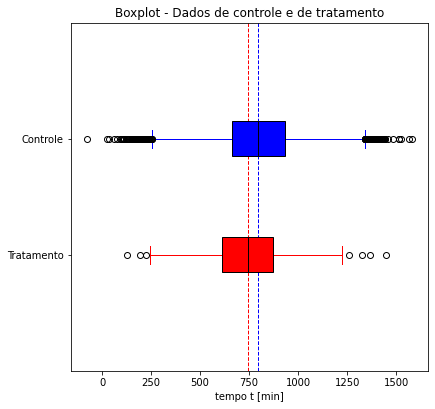

In [ ]:
# boxplots

fig = plt.figure(figsize=[6.4, 6.4])
ax = fig.add_subplot(111)

ax.boxplot(data_c, vert=0, positions=[1.5], patch_artist=True,
           boxprops=dict(facecolor='blue', color='black'),          # preenchimento e contorno (primeiro e terceiro quartis)
           capprops=dict(color='blue'),                             # máx e mín
           whiskerprops=dict(color='blue'),                         # linha horizontal
           flierprops=dict(color='black', markeredgecolor='black'), # outliers
           medianprops=dict(color='black'))                         # mediana
ax.boxplot(data_t, vert=0, positions=[1], patch_artist=True,
           boxprops=dict(facecolor='red', color='black'),           # preenchimento e contorno (primeiro e terceiro quartis)
           capprops=dict(color='red'),                              # máx e mín
           whiskerprops=dict(color='red'),                          # linha horizontal
           flierprops=dict(color='black', markeredgecolor='black'), # outliers
           medianprops=dict(color='black'))                         # mediana


ax.set_yticklabels(['Controle', 'Tratamento'])
ax.set_title('Boxplot - Dados de controle e de tratamento')
ax.set_xlabel('tempo t [min]')
ax.axvline(mediana_c, color='b', linestyle='dashed', linewidth=1)
ax.axvline(mediana_t, color='r', linestyle='dashed', linewidth=1)

plt.show()

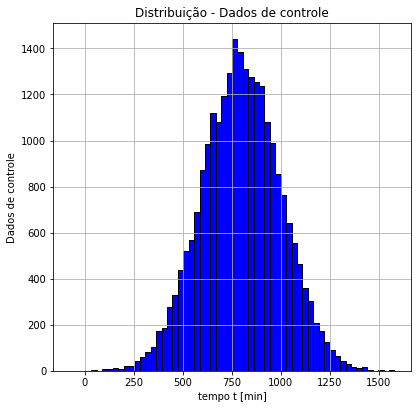

--------------------------------------------------


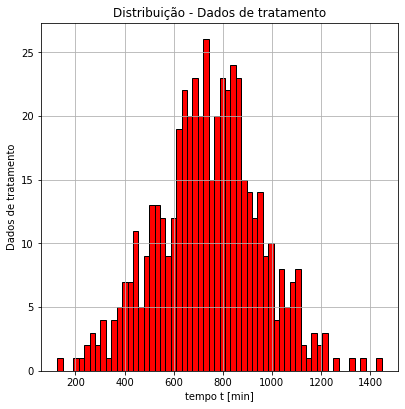

In [ ]:
# histogramas

plt.figure(1, figsize=[6.4, 6.4])
plt.grid()
plt.hist(data_c, bins=60, color='blue', edgecolor='black')
plt.title('Distribuição - Dados de controle')
plt.xlabel('tempo t [min]')
plt.ylabel('Dados de controle')
plt.show()

print(50*'-')

plt.figure(2, figsize=[6.4, 6.4])
plt.grid()
plt.hist(data_t, bins=60, color='red', edgecolor='black')
plt.title('Distribuição - Dados de tratamento')
plt.xlabel('tempo t [min]')
plt.ylabel('Dados de tratamento')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


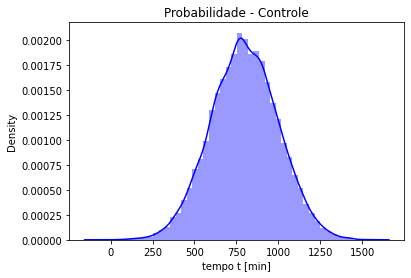

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


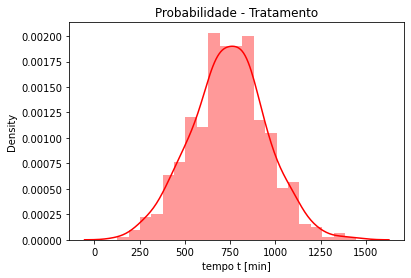

In [ ]:
# aproximação mais robusta

plt.figure()
sns.distplot(df_controle, color='blue')
plt.title('Probabilidade - Controle')
plt.xlabel('tempo t [min]')
plt.show()

plt.figure()
sns.distplot(df_tratamento, color='red')
plt.title('Probabilidade - Tratamento')
plt.xlabel('tempo t [min]')
plt.show()

A partir dos histogramas construídos, percebe-se que as disposições dos dados tanto de controle quanto de tratamento podem ser aproximadas por uma distribuição gaussiana (normal):

- C ~ N (mu_c, sigma_c)
- T ~ N (mu_t, sigma_t)

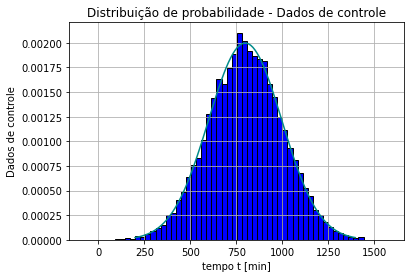

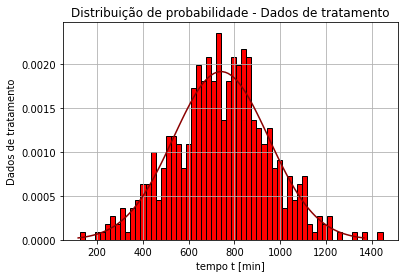

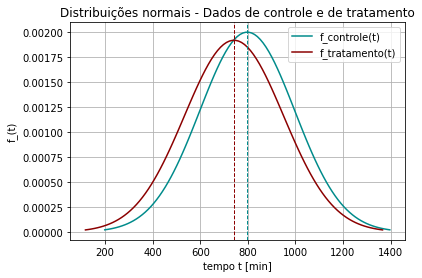

In [ ]:
# Aproximações normais:
mu_c = media_c
sigma_c = desvio_c

mu_t = media_t
sigma_t = desvio_t

# controle
plt.figure(1)
plt.grid()
plt.hist(data_c, bins=60, color='blue', edgecolor='black', density=True)
t_c = np.linspace(mu_c - 3*sigma_c, mu_c + 3*sigma_c, 100)
plt.plot(t_c, norm.pdf(t_c, mu_c, sigma_c), color='darkcyan', label='f_controle(t)')
plt.title('Distribuição de probabilidade - Dados de controle')
plt.xlabel('tempo t [min]')
plt.ylabel('Dados de controle')
plt.show()

print()

# tratamento
plt.figure(2)
plt.grid()
plt.hist(data_t, bins=60, color='red', edgecolor='black', density=True)
t_t = np.linspace(mu_t - 3*sigma_t, mu_t + 3*sigma_t, 100)
plt.plot(t_t, norm.pdf(t_t, mu_t, sigma_t), color='darkred', label='f_tratamento(t)')
plt.title('Distribuição de probabilidade - Dados de tratamento')
plt.xlabel('tempo t [min]')
plt.ylabel('Dados de tratamento')
plt.show()

print()

# distribuições normais - controle e tratamento
plt.figure(3)
t_c = np.linspace(mu_c - 3*sigma_c, mu_c + 3*sigma_c, 100)
plt.plot(t_c, norm.pdf(t_c, mu_c, sigma_c), color='darkcyan', label='f_controle(t)')
plt.title('Distribuições normais - Dados de controle e de tratamento')
plt.xlabel('tempo t [min]')
plt.ylabel('f_(t)')
t_t = np.linspace(mu_t - 3*sigma_t, mu_t + 3*sigma_t, 100)
plt.plot(t_t, norm.pdf(t_t, mu_t, sigma_t), color='darkred', label='f_tratamento(t)')
plt.grid()
plt.legend()
plt.axvline(mu_c, color='darkcyan', linestyle='dashed', linewidth=1)
plt.axvline(mu_t, color='darkred', linestyle='dashed', linewidth=1)
plt.show()

c) Realizar um teste de hipótese para verificar se há evidências estatísticas apontando para o fato que o novo processo, de fato,
diminuiu o tempo médio de espera na fila.

Teste de hipótese unilateral, considerando o desvio conhecido:
1. Hipóteses:
 - H0: mu = mu_c (média de tempo na fila não se alterou)
 - HA: mu < mu_c (média de tempo na fila diminuiu)
2. Teste de significância:
 - alpha = 1% (nível de significância - arbitrário)
 - alpha = 5%
 - alpha = 10%
3. Obtenção das amostras:
 - n = amostras_t (500 amostras)
4. Estatística do teste:
 - m = mu_t (média dos dados de tratamento)
5. Região em que a hipótese nula não é rejeitada:
 - pontos críticos determinados pela padronização da distribuição e pelo nível de significância





z limite (alpha = 0.1): -1.28
z padronizado: -6.0



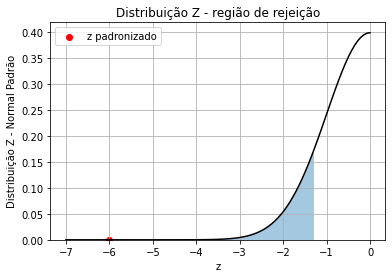


A hipótese nula é rejeitada!
Portanto, observa-se que a diferença observada entre os tempos médios de espera na fila antes e depois do tratamento é estatisticamente significativa!
Houve redução no tempo médio de espera na fila após o tratamento!

------------------------------------------------------------------------------------------------------------------------------------------------------

z limite (alpha = 0.05): -1.64
z padronizado: -6.0



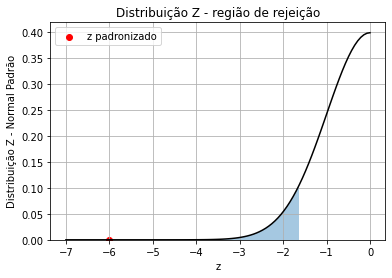


A hipótese nula é rejeitada!
Portanto, observa-se que a diferença observada entre os tempos médios de espera na fila antes e depois do tratamento é estatisticamente significativa!
Houve redução no tempo médio de espera na fila após o tratamento!

------------------------------------------------------------------------------------------------------------------------------------------------------

z limite (alpha = 0.01): -2.33
z padronizado: -6.0



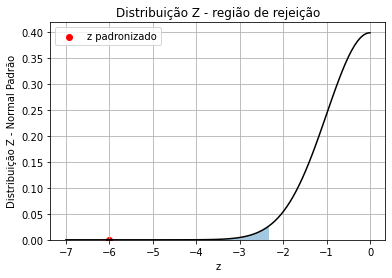


A hipótese nula é rejeitada!
Portanto, observa-se que a diferença observada entre os tempos médios de espera na fila antes e depois do tratamento é estatisticamente significativa!
Houve redução no tempo médio de espera na fila após o tratamento!

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Teste de hipótese unilateral, considerando o desvio populacional conhecido
# teste z

# H0: mu = mu_c
# HA: mu < mu_c

# nível significância:
alpha = [0.10, 0.05, 0.01]

n = amostras_t                    # número de amostras
mu = mu_c                         # média = média_controle (hipótese nula verdadeira)
m = mu_t                          # média amostral
sigma = sigma_t                   # desvio populacional = desvio amostral

z = (m - mu)/(sigma/np.sqrt(n))   # padronização

# verificando a tabela para cada nível de significância e tirando conclusões dos testes de hipótese:
for i in range(len(alpha)):
  z_critico = round(norm.ppf(alpha[i]), 2)
  print(f'\nz limite (alpha = {alpha[i]}): {z_critico}')
  print(f'z padronizado: {round(z, 2)}\n')
  plt.figure()
  plt.grid()
  plt.xlabel('z')
  plt.ylabel('Distribuição Z - Normal Padrão')
  plt.title('Distribuição Z - região de rejeição')
  x = np.linspace(-7, 0, 100)
  x2 = np.arange(-7, z_critico, 0.01)
  y = norm.pdf(x, 0, 1)
  plt.plot(x, y, '-', color='black')
  plt.scatter(z, 0, color='red', label='z padronizado')
  plt.bar(x2, norm.pdf(x2, 0, 1), width=0.01, alpha=0.4)
  plt.legend()
  plt.show()
  if (z < z_critico):
    print('\nA hipótese nula é rejeitada!')
    print('Portanto, observa-se que a diferença observada entre os tempos médios de espera na fila antes e depois do tratamento é estatisticamente significativa!')
    print('Houve redução no tempo médio de espera na fila após o tratamento!\n')
    print(150*'-')
  else:
    print('\nA hipótese nula NÃO é rejeitada!\n')
    print('Portanto, observa-se que a diferença observada entre os tempos médios de espera na fila antes e depois do tratamento NÃO é estatisticamente significativa!')
    print('Não houve redução no tempo médio de espera na fila após o tratamento!\n')
    print(150*'-')

Teste de hipótese unilateral (considerando o desvio populacional desconhecido):
1. Hipóteses:
 - H0: mu = mu_c (média de tempo na fila não se alterou)
 - HA: mu < mu_c (média de tempo na fila diminuiu)
2. Teste de significância:
 - alpha = 1% (nível de significância - arbitrário)
 - alpha = 5%
 - alpha = 10%
3. Obtenção das amostras:
 - n = amostras_t (500 amostras)
4. Estatística do teste:
 - m = mu_t (média dos dados de tratamento)
5. Região em que a hipótese nula não é rejeitada:
 - pontos críticos determinados pela padronização da distribuição e pelo nível de significância (teste t de Student)




t limite (alpha = 0.1): -1.28
t padronizado: -6.0



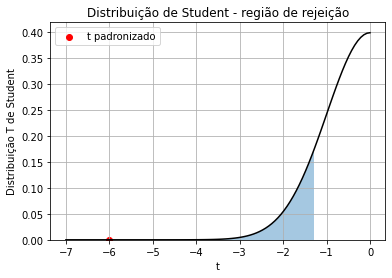


A hipótese nula é rejeitada!
Portanto, observa-se que a diferença observada entre os tempos médios de espera na fila antes e depois do tratamento é estatisticamente significativa!
Houve redução no tempo médio de espera na fila após o tratamento!

------------------------------------------------------------------------------------------------------------------------------------------------------

t limite (alpha = 0.05): -1.65
t padronizado: -6.0



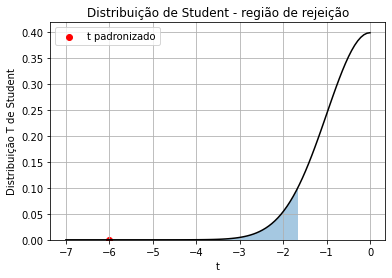


A hipótese nula é rejeitada!
Portanto, observa-se que a diferença observada entre os tempos médios de espera na fila antes e depois do tratamento é estatisticamente significativa!
Houve redução no tempo médio de espera na fila após o tratamento!

------------------------------------------------------------------------------------------------------------------------------------------------------

t limite (alpha = 0.01): -2.33
t padronizado: -6.0



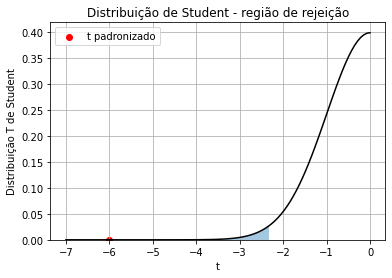


A hipótese nula é rejeitada!
Portanto, observa-se que a diferença observada entre os tempos médios de espera na fila antes e depois do tratamento é estatisticamente significativa!
Houve redução no tempo médio de espera na fila após o tratamento!

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Teste de hipótese unilateral com desvio populacional desconhecido:
# teste t de Student
# assumindo que a população seja moldada por uma distribuição normal

# H0: mu = mu_c
# HA: mu < mu_c

# nível significância:
alpha = [0.10, 0.05, 0.01]

n = amostras_t                # número de amostras
mu = mu_c                     # média = média_controle (hipótese nula verdadeira)
m = mu_t                      # média amostral
s = sigma_t                   # desvio populacional aproximado pelo desvio amostral (teste t - Student)

t = (m - mu)/(s/np.sqrt(n))   # t de Student
k = n - 1                     # grau de liberdade

# t crítico para cada alpha e avaliação do teste:
for i in range(len(alpha)):
  t_critico = round(t_student.ppf(alpha[i], k), 2)
  print(f'\nt limite (alpha = {alpha[i]}): {t_critico}')
  print(f't padronizado: {round(t, 2)}\n')
  plt.figure()
  plt.grid()
  plt.xlabel('t')
  plt.ylabel('Distribuição T de Student')
  plt.title('Distribuição de Student - região de rejeição')
  x = np.linspace(-7, 0, 100)
  x2 = np.arange(-7, t_critico, 0.01)
  y = t_student.pdf(x, k, 0, 1)
  plt.plot(x, y, '-', color='black')
  plt.scatter(t, 0, color='red', label='t padronizado')
  plt.bar(x2, t_student.pdf(x2, k, 0, 1), width=0.01, alpha=0.4)
  plt.legend()
  plt.show()
  if (t < t_critico):
    print('\nA hipótese nula é rejeitada!')
    print('Portanto, observa-se que a diferença observada entre os tempos médios de espera na fila antes e depois do tratamento é estatisticamente significativa!')
    print('Houve redução no tempo médio de espera na fila após o tratamento!\n')
    print(150*'-')
  else:
    print('\nA hipótese nula NÃO é rejeitada!\n')
    print('Portanto, observa-se que a diferença observada entre os tempos médios de espera na fila antes e depois do tratamento NÃO é estatisticamente significativa!')
    print('Não houve redução no tempo médio de espera na fila após o tratamento!\n')
    print(150*'-')

Analisando-se os resultados, percebe-se que a consideração sobre o desvio populacional conhecido ou desconhecido não interfere no resultado final. Explica-se isso pelo fato do grau de liberdade da distribuição t de Student ser alto, em função do grande número de amostras, o que aproxima cada vez mais essa distribuição de uma normal padrão.

Desta forma, pode-se considerar os desvios amostrais como os populacionais sem grandes perdas de precisão e confiabilidade.

Teste de hipótese unilateral, comparando as médias amostrais (antes e depois do tratamento):
1. Hipóteses:
 - H0: mu_c - mu_t = 0 (média de tempo na fila não se alterou)
 - HA: mu_c - mu_t > 0 (média de tempo na fila diminuiu)
2. Teste de significância:
 - alpha = 1% (nível de significância - arbitrário)
 - alpha = 5%
 - alpha = 10%
3. Obtenção das amostras:
 - n_c = amostras_c (24800 amostras)
 - n_t = amostras_t (500 amostras)
4. Estatística do teste:
 - m_c = media_c (média dos dados de controle)
 - m_t = media_t (média dos dados de tratamento)
5. Região em que a hipótese nula não é rejeitada:
 - pontos críticos determinados pela padronização da distribuição e pelo nível de significância


In [ ]:
# Teste de hipótese unilateral considerando comparação entre médias:

# H0: mu_c - mu_t = 0
# HA: mu_c - mu_t > 0

# nível significância:
alpha = [0.10, 0.05, 0.01]

# controle:
n_c = amostras_c      # número de amostras
m_c = media_c         # média amostral
sigma_c = desvio_c    # desvio amostral

# tratamento:
n_t = amostras_t
m_t = media_t
sigma_t = desvio_t

# hipótese nula:
D0 = 0

# padronizando:
z = (m_t - m_c - D0) / np.sqrt((np.power(sigma_c, 2)/n_c) + (np.power(sigma_t, 2)/n_t))

# verificando a tabela para cada nível de significância e tirando conclusões dos testes de hipótese:
for i in range(len(alpha)):
  z_critico = round(norm.ppf(alpha[i]), 2)
  print(f'\nz limite (alpha = {alpha[i]}): {z_critico}')
  print(f'z padronizado: {round(z, 2)}\n')
  if (z < z_critico):
    print('A hipótese nula é rejeitada!')
    print('Portanto, observa-se que a diferença observada entre os tempos médios de espera na fila antes e depois do tratamento é estatisticamente significativa!')
    print('Houve redução no tempo médio de espera na fila após o tratamento!\n')
    print(150*'-')
  else:
    print('A hipótese nula NÃO é rejeitada!\n')
    print('Portanto, observa-se que a diferença observada entre os tempos médios de espera na fila antes e depois do tratamento NÃO é estatisticamente significativa!')
    print('Não houve redução no tempo médio de espera na fila após o tratamento!\n')
    print(150*'-')


z limite (alpha = 0.1): -1.28
z padronizado: -5.94

A hipótese nula é rejeitada!
Portanto, observa-se que a diferença observada entre os tempos médios de espera na fila antes e depois do tratamento é estatisticamente significativa!
Houve redução no tempo médio de espera na fila após o tratamento!

------------------------------------------------------------------------------------------------------------------------------------------------------

z limite (alpha = 0.05): -1.64
z padronizado: -5.94

A hipótese nula é rejeitada!
Portanto, observa-se que a diferença observada entre os tempos médios de espera na fila antes e depois do tratamento é estatisticamente significativa!
Houve redução no tempo médio de espera na fila após o tratamento!

------------------------------------------------------------------------------------------------------------------------------------------------------

z limite (alpha = 0.01): -2.33
z padronizado: -5.94

A hipótese nula é rejeitada!
Portanto, obse

Ao considerarmos duas populações distintas (e de fato são fontes de dados cujos métodos para o tempo de espera na fila são diferentes), percebe-se que o resultado se aproxima do obtido para uma população só, em decorrência da diferença na quantidade de amostras dos dados de controle e de tratamento.

Assim, o termo referente ao desvio do grupo de controle possui pouca contribuição (grande número de amostras) e o resultado se aproxima do teste de hipótese unilateral considerando uma população apenas (seja com desvio conhecido ou desconhecido).

d) Calcular o valor-p associado ao teste e discutir os resultados obtidos.

In [ ]:
# valor-p para teste unilateral com desvio conhecido:
n = amostras_t                    # número de amostras
mu = mu_c                         # média = média_controle (hipótese nula verdadeira)
m = mu_t                          # média amostral
sigma = sigma_t                   # desvio populacional = desvio amostral

print('Valor-p para teste unilateral com desvio conhecido:')

z = (m - mu)/(sigma/np.sqrt(n))   # padronização
print(f'z padronizado: {round(z, 2)}')

valor_p = norm.cdf(z)
print(f'Valor-p associado: {valor_p*100}%\n')

#

# valor-p para teste unilateral com desvio desconhecido:
n = amostras_t                # número de amostras
mu = mu_c                     # média = média_controle (hipótese nula verdadeira)
m = mu_t                      # média amostral
s = sigma_t                   # desvio populacional aproximado pelo desvio amostral (teste t - Student)

print('Valor-p para teste unilateral com desvio desconhecido:')

t = (m - mu)/(s/np.sqrt(n))   # t de Student
k = n - 1                     # grau de liberdade
print(f't padronizado: {round(t, 2)}')

valor_p = t_student.cdf(t, k)
print(f'Valor-p associado: {valor_p*100}%\n')

#

# valor-p para teste unilateral comparando as médias amostrais:

print('Valor-p para teste unilateral comparando médias amostrais de populações distintas:')

# controle:
n_c = amostras_c      # número de amostras
m_c = media_c         # média amostral
sigma_c = desvio_c    # desvio amostral

# tratamento:
n_t = amostras_t
m_t = media_t
sigma_t = desvio_t

# hipótese nula:
D0 = 0

# padronizando:
z = (m_t - m_c - D0) / np.sqrt((np.power(sigma_c, 2)/n_c) + (np.power(sigma_t, 2)/n_t))
print(f'z padronizado: {round(z, 2)}')

valor_p = norm.cdf(z)
print(f'Valor-p associado: {valor_p*100}%')

Valor-p para teste unilateral com desvio conhecido:
z padronizado: -6.0
Valor-p associado: 9.967866818032698e-08%

Valor-p para teste unilateral com desvio desconhecido:
t padronizado: -6.0
Valor-p associado: 1.9158800894088103e-07%

Valor-p para teste unilateral comparando médias amostrais de populações distintas:
z padronizado: -5.94
Valor-p associado: 1.395598583904755e-07%


Percebe-se que o valor-p é muito pequeno, podendo ser considerado inclusive nulo, independentemente do teste de hipótese empregado. Tal constatação implica no fato de que os dados obtidos antes do tratamento (controle) e depois da aplicação do novo método (tratamento) possuem diferenças estatísticas que não são fruto do acaso. Mesmo com a diferença na quantidade de amostras disponíveis, a análise descritiva já permitia alguma suspeita a respeito de tal ocorrência, a qual é confirmada com o emprego de diferentes testes de hipóteses.

Assim, o valor-p é menor do que a maioria dos níveis de significância relevantes, o que faz com que a hipótese nula de que não houve diminuição na média de tempo de espera na fila antes e depois do tratamento seja rejeitada, além de que se faz possível afirmar que a variação entre as médias é estatisticamente significativa.

